In [1]:
import os

import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests

import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ["svg"]
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 5
plt.rcParams["pdf.fonttype"] = 42

PATH_DATA = "data"
PATH_OUTPUT = "output"
if not os.path.exists(PATH_OUTPUT):
    os.mkdir(PATH_OUTPUT)

In [2]:
data = pd.read_excel(
    os.path.join(PATH_DATA, "tc-1042_proteinquant_3243.xlsx"),
    sheet_name="Protein Quant",
    header=[0, 1],
).drop("Summed S/N, Column Normalized, Scaled to 100 per Protein", level=0, axis=1)
data.columns = data.columns.droplevel(0)
data

,ProteinID,GeneSymbol,Description,Peptides,15G_c9_+_1,15G_c10_+_2,15G_c12_+_3,99G_c5_+_1,99G_c8_+_2,99G_c26_+_3,...,15G_c12_-7_3,99G_c5_-7_1,99G_c8_-7_2,99G_c26_-7_3,15G_c9_-14_1,15G_c10_-14_2,15G_c12_-14_3,99G_c5_-14_1,99G_c8_-14_2,99G_c26_-14_3
0,P18669,PGAM1,Phosphoglycerate mutase 1,46,7887.2700,7902.4200,8553.0400,9019.3500,8881.2700,6634.8300,...,7817.0200,8544.2900,8487.9300,6264.2700,8123.5200,7318.8300,8170.59000,9134.1000,8459.8100,6592.1600
1,P13637-3,ATP1A3,Isoform 3 of Sodium/potassium-transporting ATP...,41,7749.2200,8076.7200,8258.2000,6951.2500,7085.6700,8735.2600,...,8247.1100,6826.0900,7040.7200,8327.8800,7868.5600,7610.4400,7830.58000,6680.9300,7055.7700,8353.2900
2,P68032,ACTC1,"Actin, alpha cardiac muscle 1",41,5919.6400,6512.9600,6442.6500,5482.3900,6095.4500,5986.5100,...,6244.3000,5490.8200,5975.7000,6255.2700,6139.1400,6263.4200,6219.90000,4986.5800,5191.7900,5690.8000
3,Q71U36,TUBA1A,Tubulin alpha-1A chain,36,6433.1100,5963.1500,5696.2300,6266.9200,6318.3600,5424.3700,...,5701.9500,6142.1500,6155.1000,5286.9400,6410.3800,5747.7000,5499.71000,5760.5800,5840.6800,5079.4400
4,P48643,CCT5,T-complex protein 1 subunit epsilon,35,5403.7900,5509.6000,5289.3900,5688.7100,5763.0100,5930.1300,...,5016.6800,5413.8000,5165.1500,5672.6100,5684.2600,5280.8500,5308.09000,5522.5300,5038.0400,5414.2800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8810,Q9UJP4,KLHL21,Kelch-like protein 21,1,33.0409,22.8696,41.8188,70.3054,28.9848,24.0682,...,38.7050,62.8294,36.2472,39.4656,21.8712,30.7902,35.66010,59.4173,44.2470,30.9789
8811,P04201,MAS1,Proto-oncogene Mas,1,56.0438,74.9132,83.5003,38.4647,35.8456,57.3726,...,79.2072,36.4591,39.4896,52.4569,61.2093,75.8937,85.16350,28.4499,42.8962,60.5941
8812,Q969L4,LSM10,U7 snRNA-associated Sm-like protein LSm10,1,16.7779,16.8184,14.9368,15.2126,12.3768,13.6438,...,17.7103,20.8968,14.6070,13.7241,14.9358,20.1370,8.90337,16.7258,12.4354,14.1957
8813,Q9NW97,TMEM51,Transmembrane protein 51,1,192.6290,168.6850,139.8370,248.6230,167.3130,117.0790,...,114.3030,208.2990,162.1400,109.8640,185.6780,148.1230,135.93900,206.0450,176.9710,121.3030


In [3]:
intensity_columns = [
    "15G_c9_+_1",
    "15G_c10_+_2",
    "15G_c12_+_3",
    "99G_c5_+_1",
    "99G_c8_+_2",
    "99G_c26_+_3",
    "15G_c9_-7_1",
    "15G_c10_-7_2",
    "15G_c12_-7_3",
    "99G_c5_-7_1",
    "99G_c8_-7_2",
    "99G_c26_-7_3",
    "15G_c9_-14_1",
    "15G_c10_-14_2",
    "15G_c12_-14_3",
    "99G_c5_-14_1",
    "99G_c8_-14_2",
    "99G_c26_-14_3",
]
samples = [x[:-2] for x in intensity_columns]
clones_15 = ["15G_c9", "15G_c10", "15G_c12"]
clones_99 = ["99G_c5", "99G_c8", "99G_c26"]
clones = clones_15 + clones_99

metadata = data[["ProteinID", "GeneSymbol", "Description", "Peptides"]]
metadata

,ProteinID,GeneSymbol,Description,Peptides
0,P18669,PGAM1,Phosphoglycerate mutase 1,46
1,P13637-3,ATP1A3,Isoform 3 of Sodium/potassium-transporting ATP...,41
2,P68032,ACTC1,"Actin, alpha cardiac muscle 1",41
3,Q71U36,TUBA1A,Tubulin alpha-1A chain,36
4,P48643,CCT5,T-complex protein 1 subunit epsilon,35
...,...,...,...,...
8810,Q9UJP4,KLHL21,Kelch-like protein 21,1
8811,P04201,MAS1,Proto-oncogene Mas,1
8812,Q969L4,LSM10,U7 snRNA-associated Sm-like protein LSm10,1
8813,Q9NW97,TMEM51,Transmembrane protein 51,1


In [4]:
intensities = data[intensity_columns].rename(columns=dict(zip(intensity_columns, samples)))
intensities

,15G_c9_+,15G_c10_+,15G_c12_+,99G_c5_+,99G_c8_+,99G_c26_+,15G_c9_-7,15G_c10_-7,15G_c12_-7,99G_c5_-7,99G_c8_-7,99G_c26_-7,15G_c9_-14,15G_c10_-14,15G_c12_-14,99G_c5_-14,99G_c8_-14,99G_c26_-14
0,7887.2700,7902.4200,8553.0400,9019.3500,8881.2700,6634.8300,8168.8600,7447.3800,7817.0200,8544.2900,8487.9300,6264.2700,8123.5200,7318.8300,8170.59000,9134.1000,8459.8100,6592.1600
1,7749.2200,8076.7200,8258.2000,6951.2500,7085.6700,8735.2600,7659.8800,7741.6600,8247.1100,6826.0900,7040.7200,8327.8800,7868.5600,7610.4400,7830.58000,6680.9300,7055.7700,8353.2900
2,5919.6400,6512.9600,6442.6500,5482.3900,6095.4500,5986.5100,5931.2900,7717.2600,6244.3000,5490.8200,5975.7000,6255.2700,6139.1400,6263.4200,6219.90000,4986.5800,5191.7900,5690.8000
3,6433.1100,5963.1500,5696.2300,6266.9200,6318.3600,5424.3700,6472.6800,6377.9300,5701.9500,6142.1500,6155.1000,5286.9400,6410.3800,5747.7000,5499.71000,5760.5800,5840.6800,5079.4400
4,5403.7900,5509.6000,5289.3900,5688.7100,5763.0100,5930.1300,5599.9900,5489.4300,5016.6800,5413.8000,5165.1500,5672.6100,5684.2600,5280.8500,5308.09000,5522.5300,5038.0400,5414.2800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8810,33.0409,22.8696,41.8188,70.3054,28.9848,24.0682,32.2594,31.7464,38.7050,62.8294,36.2472,39.4656,21.8712,30.7902,35.66010,59.4173,44.2470,30.9789
8811,56.0438,74.9132,83.5003,38.4647,35.8456,57.3726,51.8627,63.1106,79.2072,36.4591,39.4896,52.4569,61.2093,75.8937,85.16350,28.4499,42.8962,60.5941
8812,16.7779,16.8184,14.9368,15.2126,12.3768,13.6438,19.6251,12.6078,17.7103,20.8968,14.6070,13.7241,14.9358,20.1370,8.90337,16.7258,12.4354,14.1957
8813,192.6290,168.6850,139.8370,248.6230,167.3130,117.0790,191.9730,160.4780,114.3030,208.2990,162.1400,109.8640,185.6780,148.1230,135.93900,206.0450,176.9710,121.3030


In [5]:
# to handle nested replicates (2 +DOX-corrected -DOX timepoints across 3 clones
# for each condition), average cross timepoints and perform t-test between
# clones of the two conditions

logFC_all = pd.concat(
    [pd.Series(
        # normalize each -DOX timepoint to +DOX, then average LFC between timepoints
        ( (intensities[f"{clone}_-7"] / intensities[f"{clone}_+"]).apply(np.log2) + 
          (intensities[f"{clone}_-14"] / intensities[f"{clone}_+"]).apply(np.log2) ) / 2,
        name=clone
    ) for clone in clones],
    axis=1,
)
# compare between 15xGly and 99xGly clones
logFC_all["log FC"] = logFC_all[clones_99].mean(axis=1) - logFC_all[clones_15].mean(axis=1)
logFC_all["p"] = stats.ttest_ind(
    logFC_all[clones_15].values,
    logFC_all[clones_99].values,
    axis=1,
).pvalue

logFC_all = logFC_all[logFC_all["p"].notna()]

# multiple test correction
logFC_all["padj"] = multipletests(logFC_all["p"].values, method="fdr_bh")[1]
logFC_all


c:\Users\jason\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1221: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean
c:\Users\jason\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\jason\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:6114: RuntimeWarning: invalid value encountered in subtract
  d = mean1 - mean2


,15G_c9,15G_c10,15G_c12,99G_c5,99G_c8,99G_c26,log FC,p,padj
0,0.046594,-0.098122,-0.097908,-0.029912,-0.067747,-0.046111,0.001889,0.971354,0.993376
1,0.002660,-0.073458,-0.039323,-0.041718,-0.007641,-0.066704,-0.001980,0.946791,0.988365
2,0.027682,0.094206,-0.047939,-0.067269,-0.130063,-0.004863,-0.092048,0.167719,0.690556
3,0.001870,0.021962,-0.024602,-0.075278,-0.075591,-0.065904,-0.072001,0.006528,0.639696
4,0.062227,-0.033234,-0.035638,-0.057116,-0.175986,-0.097673,-0.108043,0.085272,0.650417
...,...,...,...,...,...,...,...,...,...
8810,-0.314877,0.451101,-0.170736,-0.202474,0.466428,0.538813,0.279093,0.449163,0.832906
8811,0.007669,-0.114289,-0.023848,-0.256184,0.199365,-0.025207,0.016147,0.911533,0.979714
8812,0.029175,-0.077958,-0.250365,0.297412,0.122918,0.032837,0.250772,0.089748,0.650417
8813,-0.028972,-0.129746,-0.165835,-0.263152,0.017827,-0.020315,0.019637,0.849535,0.961431


# GO enrichment analysis

In [6]:
# p value and log fold-change cutoffs for proteins considered "up" or "down"
# for GO enrichment analysis
CUTOFF_P = 0.05
CUTOFF_LFC = 0.25

df = pd.concat(
    [metadata, logFC_all, intensities.applymap(np.log2).mean(axis=1).rename("mean")],
    axis=1,
    join="inner",
)
proteins_down = (
    df[(df["log FC"] < -CUTOFF_LFC) & (df["p"] < CUTOFF_P)]
    .sort_values("log FC")["GeneSymbol"]
    .values
)
proteins_up = (
    df[(df["log FC"] > CUTOFF_LFC) & (df["p"] < CUTOFF_P)]
    .sort_values("log FC")["GeneSymbol"]
    .values
)
print(f"background set: {len(df)} quantitated proteins")
print(f"{len(proteins_down)} down and {len(proteins_up)} up")

background set: 8807 quantitated proteins
61 down and 150 up


c:\Users\jason\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\frame.py:8931: RuntimeWarning: divide by zero encountered in log2
  return lib.map_infer(x.astype(object)._values, func, ignore_na=ignore_na)


In [7]:
# load gene symbol ID mapping for protein coding genes
from goatools.cli.ncbi_gene_results_to_python import ncbi_tsv_to_py

ncbi_tsv_to_py(
    os.path.join(PATH_DATA, "gene_result.txt"), "genes_ncbi_9606_proteincoding.py"
)
from genes_ncbi_9606_proteincoding import GENEID2NT as GeneID2nt_human

nts = [nt for nt in GeneID2nt_human.values()]
sym2nt = {nt.Symbol: nt for nt in nts}
print("{N:,} gene symbols".format(N=len(sym2nt)))

# Load GO graph
from goatools.base import download_go_basic_obo
from goatools.obo_parser import GODag

obo_fname = download_go_basic_obo()
obodag = GODag(obo_fname)

# load gene annotations
from goatools.base import download_ncbi_associations
from goatools.anno.genetogo_reader import Gene2GoReader

gene2go_fname = download_ncbi_associations()
objanno = Gene2GoReader(gene2go_fname, taxids=[9606])
ns2assoc = objanno.get_ns2assc()
for nspc, id2gos in ns2assoc.items():
    print("{NS} {N:,} annotated human genes".format(NS=nspc, N=len(id2gos)))

      20,616 lines READ:  data\gene_result.txt
      20,598 geneids WROTE: genes_ncbi_9606_proteincoding.py
20,598 gene symbols
  EXISTS: go-basic.obo
go-basic.obo: fmt(1.2) rel(2022-07-01) 47,008 Terms
  EXISTS: gene2go
HMS:0:00:03.918536 350,120 annotations, 20,728 genes, 18,978 GOs, 1 taxids READ: gene2go 
MF 18,266 annotated human genes
CC 19,761 annotated human genes
BP 18,708 annotated human genes


In [8]:
from goatools.goea.go_enrichment_ns import GOEnrichmentStudyNS

goeaobj = GOEnrichmentStudyNS(
    {
        sym2nt[symbol].GeneID
        for symbol in df[df["GeneSymbol"].isin(sym2nt)]["GeneSymbol"].values
    },
    ns2assoc,
    obodag,
    propagate_counts=True,
    alpha=0.01,
    methods=["fdr_bh"],
)


Load BP Ontology Enrichment Analysis ...
Propagating term counts up: is_a
 93%  7,868 of  8,416 population items found in association

Load CC Ontology Enrichment Analysis ...
Propagating term counts up: is_a
 97%  8,128 of  8,416 population items found in association

Load MF Ontology Enrichment Analysis ...
Propagating term counts up: is_a
 96%  8,067 of  8,416 population items found in association


In [9]:
def run_go(genes):
    gene_ids = [sym2nt[symbol].GeneID for symbol in genes if symbol in sym2nt]
    goea_results_all = goeaobj.run_study(gene_ids)

    GO_results = []
    for rec in goea_results_all:
        GO_results.append([
            rec.goterm.name,
            rec.NS,
            rec.study_count,
            rec.pop_count,
            (rec.study_count / rec.study_n) / (rec.pop_count / rec.pop_n),
            rec.p_fdr_bh,
        ])
    GO_results = pd.DataFrame(GO_results, columns=[
        "term",
        "namespace",
        "count",
        "size",
        "ratio",
        "p_adj"
    ])
    return GO_results

In [10]:
go_down = run_go(proteins_down)
go_up = run_go(proteins_up)


Runing BP Ontology Analysis: current study set of 61 IDs.
 85%     52 of     61 study items found in association
100%     61 of     61 study items found in population(8416)
Calculating 12,668 uncorrected p-values using fisher_scipy_stats
  12,668 terms are associated with  7,868 of  8,416 population items
   1,238 terms are associated with     52 of     61 study items
  METHOD fdr_bh:
       2 GO terms found significant (< 0.01=alpha) (  2 enriched +   0 purified): statsmodels fdr_bh
       5 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Runing CC Ontology Analysis: current study set of 61 IDs.
 93%     57 of     61 study items found in association
100%     61 of     61 study items found in population(8416)
Calculating 1,734 uncorrected p-values using fisher_scipy_stats
   1,734 terms are associated with  8,128 of  8,416 population items
     226 terms are associated with     57 of     61 study items
  MET

In [11]:
# shortened versions of GO terms to display in figure
GO_abbrev = {
    "tRNA splicing, via endonucleolytic cleavage and ligation": "tRNA splicing, via cleavage and ligation",
    "RNA splicing, via endonucleolytic cleavage and ligation": "RNA splicing, via cleavage and ligation",
    "regulation of cysteine-type endopeptidase activity involved in apoptotic process": "cysteine endopeptidase in apoptosis"
}

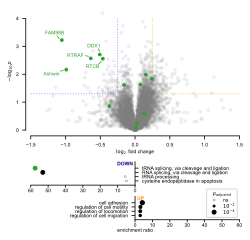

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.transforms as transforms
import proteomics.plotting

# colors for GO terms and associated proteins in volcano plot
COLORS = ["tab:green", "tab:purple", "tab:orange", "tab:blue", "tab:red"]
# number of up and down GO terms to display
NUM_TERMS = 4
# x-axis limit for GO term enrichment ratio
ENRICHMENT_MAX = 60
# x-axis limit for volcano plot
LFC_MAX = 1.5
# GO term enrichment adjusted p value cutoff for significance
GO_P_CUTOFF = 0.01
# points to annotate on volcano plot, where each entry is (
#   GENE SYMBOL,
#   (x, y) label offset in inches,
#   (x, y) relative position of arrow in text box between 0 and 1,
#   arrow curve direction (1 or -1),
#   label text kwargs,
#   label text (None if same as gene symbol)
# )
LABELS = [
    ("FAM98B", (-0.1, 0.08), (0.6, 0), 1, {"ha": "center"}, None),
    ("RTCB", (-0.03, -0.08), (0.7, 0.75), 1, {"ha": "right", "va": "top"}, None),
    ("DDX1", (0.03, 0.1), (0.75, 0), -1, {"ha": "right"}, None),
    ("RTRAF", (-0.08, 0.02), (1, 0.5), -1, {"ha": "right"}, None),
    ("C2orf49", (-0.075, -0.08), (0.8, 0.5), -1, {"ha": "right"}, "Ashwin"),
]
# GO terms to color
TERMS = [
    "tRNA splicing, via endonucleolytic cleavage and ligation",
]

# construct mapping for selected GO terms to their gene symbols
term2genes = {}
term2idx = {}
for idx, t in enumerate(TERMS):
    goterm = [x for x in obodag.values() if x.name == t][0].id
    term2genes[t] = {
        GeneID2nt_human[i].Symbol
        for i, v in ns2assoc["BP"].items()
        if goterm in v and i in GeneID2nt_human
    }
    term2idx[t] = idx

fig, axs = plt.subplot_mosaic(
    "AAA;XXX;BZC;DZE",
    figsize=(3.75, 3.2),
    gridspec_kw={
        "height_ratios": [5.5, 0.15, 1, 1],
        "width_ratios": [1, 0, 1],
        "top": 1,
        "bottom": 0.075,
    },
)

# volcano plot
axv = axs["A"]
axv.plot(
    [-LFC_MAX, -CUTOFF_LFC, -CUTOFF_LFC],
    [-np.log10(CUTOFF_P), -np.log10(CUTOFF_P), 4],
    c="blue",
    ls="dotted",
    lw=1,
    alpha=0.4,
    zorder=-1,
)
axv.plot(
    [LFC_MAX, CUTOFF_LFC, CUTOFF_LFC],
    [-np.log10(CUTOFF_P), -np.log10(CUTOFF_P), 4],
    c="orange",
    ls="dotted",
    lw=1,
    alpha=0.6,
    zorder=-1,
)
df = pd.concat([metadata, logFC_all], axis=1, join="inner")
df["-log p"] = -np.log10(df["p"])
# plot each GO term in TERMS as a separate subset
proteomics.plotting.scatter(
    df,
    "log FC",
    "-log p",
    [
        (
            set(df["GeneSymbol"]),
            {
                "c": "gray",
                "alpha": 0.1,
                "s": 7.5,
            },
            "GeneSymbol",
        )
    ]
    + [
        (
            term2genes[TERMS[i]],
            {
                "c": COLORS[i],
                "alpha": 1,
                "s": 7.5,
            },
            "GeneSymbol",
        )
        for i in range(len(TERMS))[::-1]
    ],
    ax=axv,
)
axv.set_xlim((-LFC_MAX, LFC_MAX))
axv.set_xlabel(r"$\log_2$ fold change", labelpad=2)
axv.set_ylabel(r"$-\log_{10} p$")
sns.despine(ax=axv, trim=True, offset={"left": 5})

# label points on volcano plot
for label, label_offset, relpos, curve, text_kwargs, labeltext in LABELS:
    labeltext = label if labeltext is None else labeltext

    # color label according to GO term color
    c = "k"
    for t in TERMS:
        if label in term2genes[t]:
            c = COLORS[term2idx[t]]

    # coordinates of point
    x, y = df[df["GeneSymbol"] == label].iloc[0][["log FC", "-log p"]].values
    axv.annotate(
        f" {labeltext} ",
        xy=(x, y),
        xytext=72 * np.array(label_offset),
        textcoords="offset points",
        **text_kwargs,
        c=c,
        arrowprops=dict(
            arrowstyle="-",
            connectionstyle=f"arc3,rad={'' if curve == 1 else '-'}0.2",
            shrinkA=0,
            shrinkB=3,
            relpos=relpos,
            color=c,
            lw=0.75,
        ),
        bbox=dict(boxstyle="square,pad=0.1", fc="none", ec="none"),
    )

# helper function to generate open/closed points with size according to p value
enrichment_marker_style = (
    lambda p: {"ms": -np.log10(p), "marker": "o"}
    if p <= GO_P_CUTOFF
    else {
        "mew": 0.5,
        "mec": "gray",
        "mfc": "white",
        "ms": -np.log10(GO_P_CUTOFF),
        "marker": "o",
    }
)

# GO terms down plot
ax0 = axs["B"]
# sort GO terms by enrichment ratio, with signficantly enriched terms at the top
df0 = (
    go_down.assign(significant=lambda x: x.p_adj < GO_P_CUTOFF)
    .query("namespace == 'BP' and count > 2")
    .sort_values(["significant", "ratio"], ascending=[False, False])
    .iloc[:NUM_TERMS]
)
for i, row in enumerate(df0.itertuples()):
    ax0.plot(
        [row.ratio],
        [-i],
        **enrichment_marker_style(row.p_adj),
        c=COLORS[term2idx[row.term]] if row.term in term2idx else "k",
    )
ax0.set_ylim((-NUM_TERMS, 1.5))
ax0.set_yticks(
    range(0, -NUM_TERMS, -1),
    [GO_abbrev[x] if x in GO_abbrev else x for x in df0["term"].to_list()],
)
ax0.yaxis.set_tick_params(labelsize=5)
ax0.yaxis.tick_right()
ax0.set_xlim((ENRICHMENT_MAX, 0))
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.text(
    0.98,
    1,
    "DOWN",
    transform=ax0.transAxes,
    ha="right",
    va="top",
    weight="bold",
    c="darkblue",
)

# GO terms up plot
ax1 = axs["E"]
df1 = (
    go_up.assign(significant=lambda x: x.p_adj < GO_P_CUTOFF)
    .query("namespace == 'BP' and count > 2")
    .sort_values(["significant", "ratio"], ascending=[False, False])
    .iloc[:NUM_TERMS]
)
for i, row in enumerate(df1.itertuples()):
    ax1.plot(
        [row.ratio],
        [-i],
        **enrichment_marker_style(row.p_adj),
        c=COLORS[term2idx[row.term]] if row.term in term2idx else "k",
    )
ax1.set_ylim((-NUM_TERMS, 1.5))
ax1.set_yticks(
    range(0, -NUM_TERMS, -1),
    [GO_abbrev[x] if x in GO_abbrev else x for x in df1["term"].to_list()],
)
ax1.yaxis.set_tick_params(labelsize=5)
ax1.set_xlim((0, ENRICHMENT_MAX))
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.text(
    0.02,
    1,
    "UP",
    transform=ax1.transAxes,
    ha="left",
    va="top",
    weight="bold",
    c="darkorange",
)

ax1.legend(
    handles=[
        Line2D([0], [0], lw=0, **enrichment_marker_style(1), c="k", label="ns"),
        Line2D(
            [0],
            [0],
            lw=0,
            **enrichment_marker_style(10**-2),
            c="k",
            label="$10^{-2}$",
        ),
        Line2D(
            [0],
            [0],
            lw=0,
            **enrichment_marker_style(10**-4),
            c="k",
            label="$10^{-4}$",
        ),
    ],
    title="$p_{adjusted}$",
    bbox_to_anchor=(0.98, 0.1),
    borderpad=0.5,
    labelspacing=0.3,
    borderaxespad=0,
    loc="lower right",
)

axs["Z"].set_xlabel("enrichment ratio", labelpad=5)

# hide empty axes for spacing
axs["C"].set_visible(False)
axs["D"].set_visible(False)
axs["X"].set_visible(False)
for k in axs["Z"].spines:
    axs["Z"].spines[k].set_visible(False)
axs["Z"].set_xticks([])
axs["Z"].get_yaxis().set_visible(False)

plt.subplots_adjust(hspace=0.25, wspace=0)
for ax in (axs["B"], axs["E"]):
    ax.tick_params(axis="x", length=2.5, pad=1)

In [13]:
pd.concat([metadata, logFC_all], axis=1, join="inner").to_excel(
    os.path.join(PATH_OUTPUT, "Table S4.xlsx")
)

# Session info

In [14]:
import session_info

session_info.show()